In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
import matplotlib.patches as mpatches


cities = pd.read_csv("../data/cities.csv")
cities.rename(columns = {'id': "city_id"}, inplace=True)
cities.sample(10)

,city_id,name,coords,start_year,url_name,country,country_state
261,208,Oakland,POINT(-122.2666667 37.8),2017.0,oakland,United States,Calif.
102,82,Munich,POINT(11.58333333 48.13333333),2017.0,munich,Germany,NaN
85,63,Kuala Lumpur,POINT(101.7 3.133333333),1886.0,kuala-lumpur,Malaysia,NaN
310,259,Rosario,POINT(-60.65 -32.95),2017.0,rosario,Argentina,NaN
180,138,Boise,POINT(-116.2166667 43.6),2017.0,boise,United States,Idaho
200,134,Baltimore,POINT(-76.63333333 39.3),2017.0,baltimore,United States,Md.
48,291,Caen,POINT(-0.349989259 49.18375368),2018.0,caen,France,NaN
202,137,Bismarck,POINT(-100.7833333 46.8),2017.0,bismarck,United States,N.D.
22,279,Tarbes,POINT(0.083343464 43.23329002),2018.0,tarbes,France,NaN
212,156,Dubuque,POINT(-90.66666667 42.51666667),2017.0,dubuque,United States,Iowa


In [2]:
lines = pd.read_csv("../data/lines.csv")
lines.sample(16)

,id,city_id,name,url_name,color,system_id,transport_mode_id
732,879,114,Line 2,879-line-2,#19209a,368,7.0
918,1052,79,S11,1052-s11,#9778e7,269,3.0
1260,1356,124,Van Buren,1356-van-buren,#4a90e2,493,7.0
815,918,27,93,918-93,#f49f22,378,NaN
552,652,114,Shinanomachi Line,652-shinanocho-line,#5f0101,325,5.0
720,847,247,Lakeshore East Line,847-lakeshore-east-line,#ee3023,364,NaN
810,921,82,U1,921-u1,#227700,70,NaN
584,641,114,Hondori Line,641-hondori-line,#5f0101,325,5.0
842,945,82,22,945-22,#69b8e4,380,NaN
1266,1362,91,Shiomibashi Line,1362-shiomibashi-line,#179422,373,4.0


In [3]:
station_lines = pd.read_csv('../data/station_lines.csv')
station_lines.sample(16)

,id,station_id,line_id,city_id,created_at,updated_at
12316,15112,14795,1373,139,2018-10-18 17:16:30.57211,2018-10-18 17:16:30.57211
7661,10058,10277,950,307,2018-01-28 20:14:28.426877,2018-01-28 20:14:28.426877
11054,12692,12697,1208,325,2018-08-01 14:28:04.714907,2018-08-01 14:28:04.714907
15335,8198,5010,354,95,2017-11-21 00:00:00,2017-11-21 00:00:00
13676,6510,5301,428,114,2017-11-21 00:00:00,2017-11-21 00:00:00
12938,15340,15010,1414,139,2018-10-26 14:25:14.824244,2018-10-26 14:25:14.824244
13464,6297,2959,244,79,2017-11-21 00:00:00,2017-11-21 00:00:00
10908,15688,15381,1342,91,2018-11-05 03:13:29.752129,2018-11-05 03:13:29.752129
10247,15645,15338,1291,91,2018-11-03 22:48:45.015901,2018-11-03 22:48:45.015901
14598,7458,8761,416,114,2017-11-21 00:00:00,2017-11-21 00:00:00


In [4]:
stations = pd.read_csv('../data/stations.csv')
stations[stations['name'] == "Pico"]

,id,name,geometry,buildstart,opening,closure,city_id
476,8567,Pico,POINT(-118.2662644 34.0406307),0.0,0.0,999999.0,189
870,8568,Pico,POINT(-118.2660609 34.0407563),0.0,0.0,999999.0,189
12246,12132,Pico,POINT(-58.4741980951992 -34.5410318797355),2014.0,2015.0,999999.0,1


In [5]:
systems = pd.read_csv('../data/stations.csv')
systems

,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74
...,...,...,...,...,...,...,...
15789,16554,Shinomiya,POINT(135.823937214498 34.9918683039252),1912.0,1912.0,999999.0,91
15790,16555,Keihan Yamashina,POINT(135.816689306704 34.992068923936),1912.0,1912.0,999999.0,91
15791,16556,Hino-oka,POINT(135.799931852138 34.9968986641574),1912.0,1912.0,1997.0,91
15792,16557,Kujoyama,POINT(135.792375683554 35.0018274164674),1936.0,1936.0,1997.0,91


In [6]:
track_lines = pd.read_csv('../data/track_lines.csv')
track_lines

,id,section_id,line_id,created_at,updated_at,city_id
0,2494,1278,343,2017-11-21 00:00:00,2017-11-21 00:00:00,252
1,4124,4477,779,2017-11-21 00:09:55.135507,2017-11-21 00:09:55.135507,63
2,2495,21,9,2017-11-21 00:00:00,2017-11-21 00:00:00,1
3,2496,940,228,2017-11-21 00:00:00,2017-11-21 00:00:00,79
4,4129,4478,793,2017-11-21 17:44:39.765832,2017-11-21 17:44:39.765832,48
...,...,...,...,...,...,...
9752,10699,10530,1611,2019-03-06 22:23:46.008756,2019-03-06 22:23:46.008756,91
9753,10700,10531,1611,2019-03-06 22:27:46.532431,2019-03-06 22:27:46.532431,91
9754,10701,10532,1611,2019-03-06 22:30:58.779519,2019-03-06 22:30:58.779519,91
9755,10702,10533,1610,2019-03-08 21:57:21.68915,2019-03-08 21:57:21.68915,91


In [7]:
tracks = pd.read_csv('../data/tracks.csv')
tracks

,id,geometry,buildstart,opening,closure,length,city_id
0,1911,"LINESTRING(19.0817752 47.5005079,19.0817355 47...",0.0,0.0,999999.0,6719,29
1,2563,"LINESTRING(16.4151057 48.1907238,16.4156455 48...",0.0,0.0,999999.0,199,118
2,2557,"LINESTRING(16.4164437 48.1839655,16.4161534 48...",0.0,0.0,999999.0,925,118
3,2558,"LINESTRING(16.4164901 48.1839473,16.416198 48....",0.0,0.0,999999.0,881,118
4,2564,"LINESTRING(16.415259 48.1908074,16.4153634 48....",0.0,0.0,999999.0,213,118
...,...,...,...,...,...,...,...
9266,9732,"LINESTRING(-3.838067 56.0044551,-3.8385588 56....",0.0,0.0,999999.0,383,48
9267,9734,"LINESTRING(-3.8549229 55.9960854,-3.8544735 55...",0.0,0.0,999999.0,28,48
9268,9735,"LINESTRING(-3.8597111 55.9955538,-3.8572319 55...",0.0,0.0,999999.0,305,48
9269,9736,"LINESTRING(-3.8544735 55.9961285,-3.8529015 55...",0.0,0.0,999999.0,828,48


<BarContainer object of 5 artists>

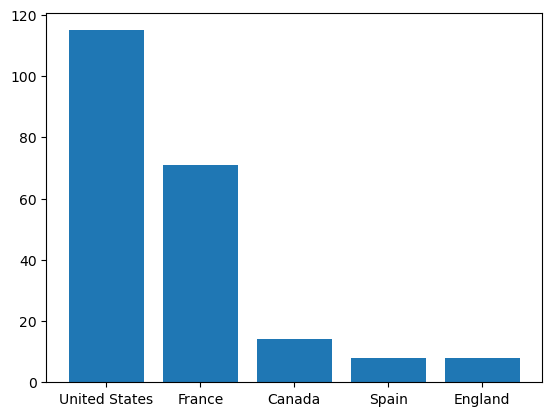

In [8]:
ranked_countries = cities["country"].value_counts().sort_values(ascending=False)

top_five_countries = ranked_countries[0:5]

fig, ax = plt.subplots()

ax.bar(top_five_countries.index, top_five_countries.values)



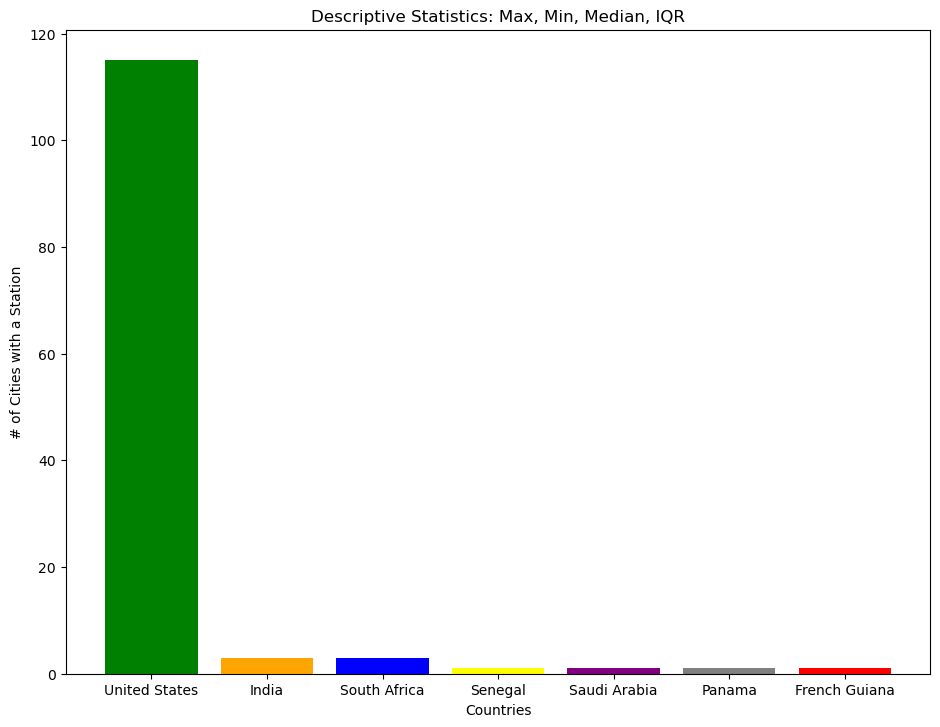

In [9]:


top_country = ranked_countries.max()
top_country_name = ranked_countries.idxmax()

bottom_country = ranked_countries.min()
bottom_country_name = ranked_countries.idxmin()

median_country = ranked_countries.median()
median_country_name = ranked_countries.index[int((len(ranked_countries) -1 ) / 2)]

q3a_country = ranked_countries.iloc[17]
q3a_country_name = ranked_countries.index[17]

q3b_country = ranked_countries.iloc[18]
q3b_country_name = ranked_countries.index[18]


q1a_country = ranked_countries.iloc[-18]
q1a_country_name = ranked_countries.index[-18]

q1b_country = ranked_countries.iloc[-19]
q1b_country_name = ranked_countries.index[-19]

countries = [
    top_country_name, q3a_country_name, 
    q3b_country_name, median_country_name, 
    q1a_country_name, q1b_country_name,
    bottom_country_name]

values = [
    top_country, q3a_country,
    q3b_country, median_country,
    q1a_country, q1b_country,
    bottom_country
]

fig, ax = plt.subplots()
c = ['green', 'orange', 'blue', 'yellow', 'purple', 'grey', 'red']
ax.bar(countries, values, color = c)
ax.set_title("Descriptive Statistics: Max, Min, Median, IQR")
ax.set_ylabel("# of Cities with a Station")
ax.set_xlabel("Countries")
fig.tight_layout()
fig.set_size_inches(10,8)




In [10]:
united_states = cities[cities["country"] == "United States"]

united_states

,city_id,name,coords,start_year,url_name,country,country_state
14,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.
163,155,Detroit,POINT(-83.05 42.33333333),2017.0,detroit,United States,Mich.
164,170,Helena,POINT(-112.0333333 46.58333333),2017.0,helena,United States,Mont.
165,214,Pierre,POINT(-100.35 44.36666667),2017.0,pierre,United States,S.D.
180,138,Boise,POINT(-116.2166667 43.6),2017.0,boise,United States,Idaho
...,...,...,...,...,...,...,...
300,248,Tulsa,POINT(-95.98333333 36.15),2017.0,tulsa,United States,Okla.
303,251,Virginia Beach,POINT(-75.96666667 36.85),2017.0,virginia-beach,United States,Va.
305,253,Wichita,POINT(-97.28333333 37.71666667),2017.0,wichita,United States,Kan.
306,254,Wilmington,POINT(-77.95 34.23333333),2017.0,wilmington,United States,N.C.


In [11]:
merged_cities_stations = pd.merge(stations, cities, on='city_id', how='left')
merged_cities_stations_us = merged_cities_stations[merged_cities_stations['country'] == 'United States']
merged_cities_stations_us.sample(10)

,id,name_x,geometry,buildstart,opening,closure,city_id,name_y,coords,start_year,url_name,country,country_state
9431,14632,Marble Hill,POINT(-73.911980329862 40.8746872896755),1906.0,1906.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
13724,14189,Kew Gardens–Union Turnpike,POINT(-73.8310074840068 40.7142867914175),1936.0,1936.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
13686,14125,221st Street,POINT(-73.9118185544594 40.8728680083269),1906.0,1906.0,1907.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
10650,11342,Race,POINT(-84.5160979197961 39.1068860651616),1920.0,2011.0,999999.0,148,Cincinnati,POINT(-84.5 39.13333333),1920.0,cincinnati,United States,Ohio
647,13718,Park Place,POINT(-73.9575324178493 40.674775553534),1899.0,1899.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
10995,12994,Simpson Street,POINT(-73.892912955803 40.8241414747772),1904.0,1904.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
3422,13538,52nd Street,POINT(-74.0156200883369 40.6464643322242),1893.0,1893.0,1940.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
12862,10604,66th Street - Lincoln Center,POINT(-73.9822243 40.7732763),1904.0,1904.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
15445,16210,Interbay,POINT(-122.375971850248 47.6434860651498),0.0,0.0,999999.0,236,Seattle,POINT(-122.3333333 47.61666667),1961.0,seattle,United States,Wash.
13426,13859,Handicapped/disabled access \tUtica Avenue,POINT(-73.9291225449916 40.6792040867353),1936.0,1936.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.


<BarContainer object of 7 artists>

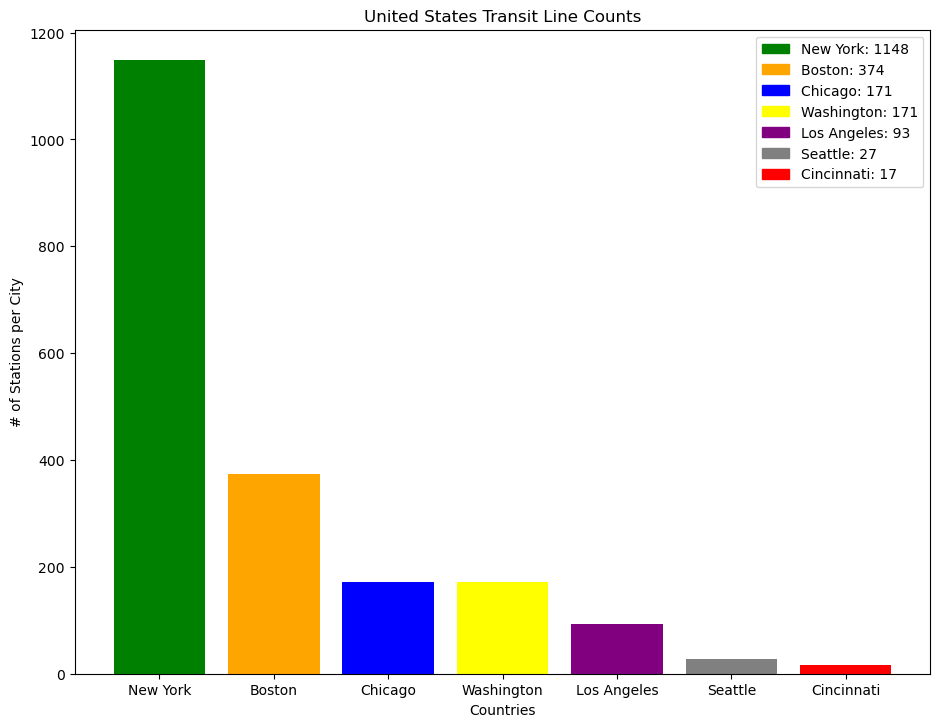

In [12]:
merged_stations_us_by_state = merged_cities_stations_us.value_counts('name_y')
merged_stations_us_by_state

fig, ax = plt.subplots()
ax.set_title("United States Transit Line Counts")
ax.set_ylabel("# of Stations per City")
ax.set_xlabel("Countries")
new_york_legend = mpatches.Patch(color= 'green', label='New York: 1148')
boston_legend = mpatches.Patch(color= 'orange', label='Boston: 374')
chicago_legend = mpatches.Patch(color= 'blue', label='Chicago: 171')
washington_legend = mpatches.Patch(color= 'yellow', label='Washington: 171')
los_angeles_legend = mpatches.Patch(color= 'purple', label='Los Angeles: 93')
seattle_legend = mpatches.Patch(color= 'grey', label='Seattle: 27')
cincinnati_legend = mpatches.Patch(color= 'red', label='Cincinnati: 17')
plt.legend(handles=[new_york_legend, boston_legend, chicago_legend, washington_legend, los_angeles_legend, seattle_legend, cincinnati_legend ])
#ax.legend(["1148", "374", "171", "171", "93", "27", "17"])
fig.tight_layout()
fig.set_size_inches(10,8)
c = ['green', 'orange', 'blue', 'yellow', 'purple', 'grey', 'red']
ax.bar(merged_stations_us_by_state.index, merged_stations_us_by_state.values, color = c)

In [13]:
stations

,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74
...,...,...,...,...,...,...,...
15789,16554,Shinomiya,POINT(135.823937214498 34.9918683039252),1912.0,1912.0,999999.0,91
15790,16555,Keihan Yamashina,POINT(135.816689306704 34.992068923936),1912.0,1912.0,999999.0,91
15791,16556,Hino-oka,POINT(135.799931852138 34.9968986641574),1912.0,1912.0,1997.0,91
15792,16557,Kujoyama,POINT(135.792375683554 35.0018274164674),1936.0,1936.0,1997.0,91


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


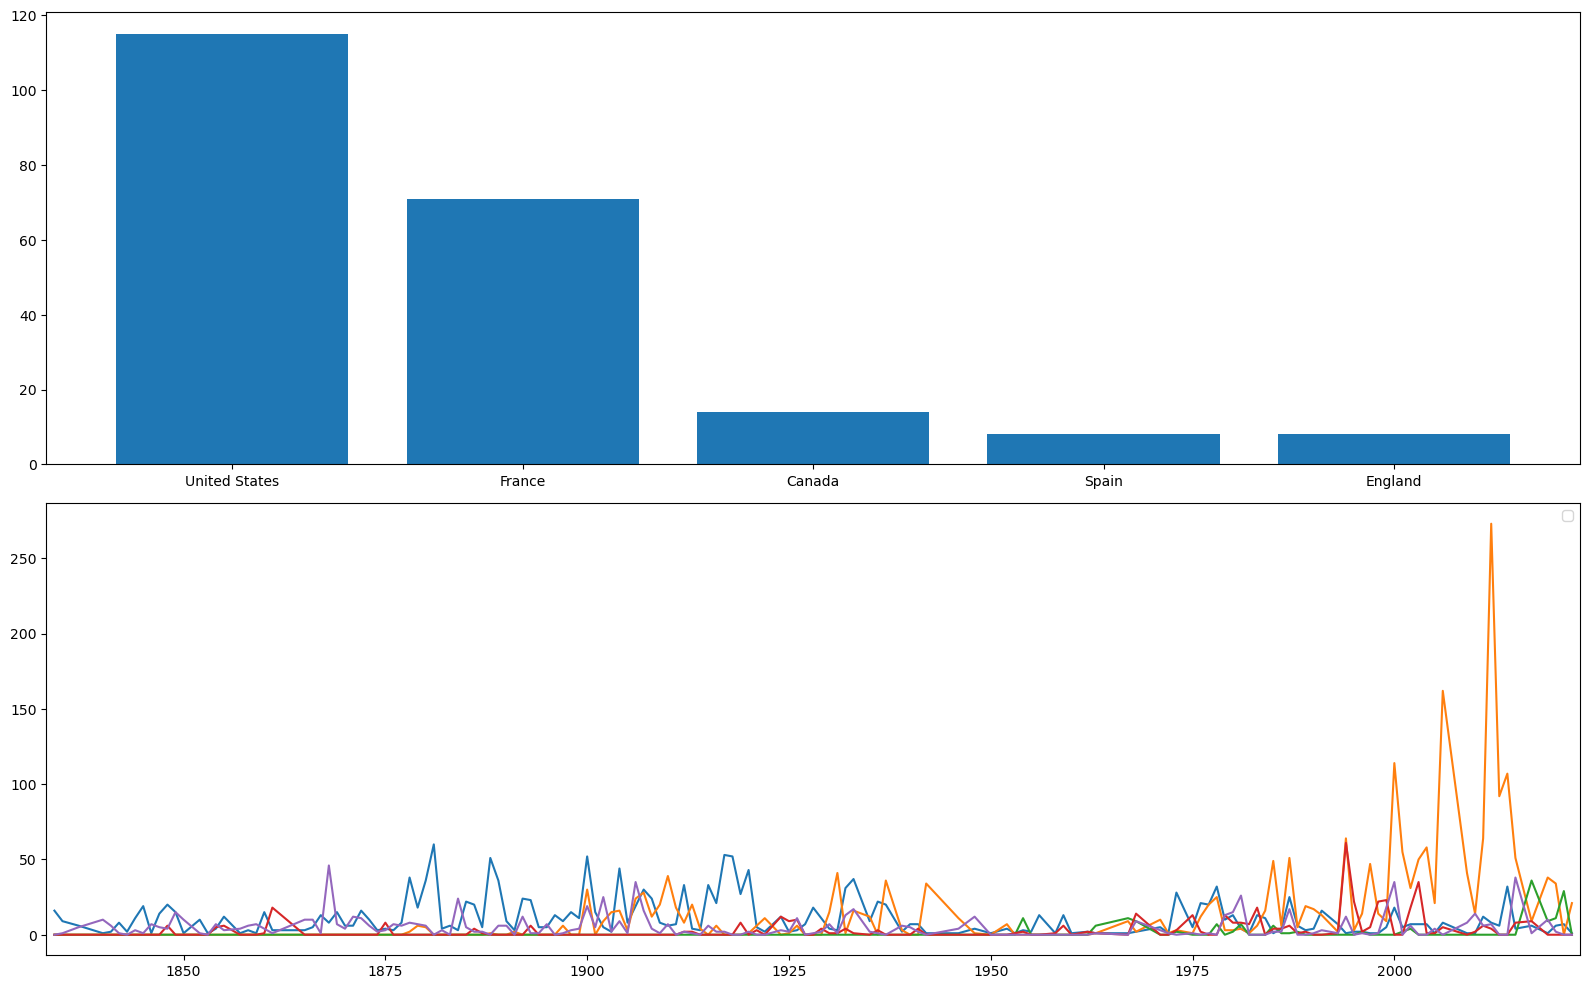

In [14]:
merged_cities_stations.sample(10)

def openings_years_per_country(df, country1, country2, country3, country4, country5):
    openings_per_country_df = pd.DataFrame()
    openings_per_country_df[country1] = df[(df['country'] == country1) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country2] = df[(df['country'] == country2) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country3] = df[(df['country'] == country3) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country4] = df[(df['country'] == country4) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country5] = df[(df['country'] == country5) & (df['opening'] > 0)].value_counts('opening')

    openings_per_country_df[[country1, country2, country3, country4, country5]] = \
        openings_per_country_df[[country1, country2, country3, country4, country5]].fillna(0)

    return openings_per_country_df.sort_index()


openings_per_country_df = openings_years_per_country(merged_cities_stations, 'United States', "France", 'Canada', 'Spain', 'England')

fig, axs = plt.subplots(2,1)

axs[1].plot(openings_per_country_df)
axs[1].set_xlim(1833, 2023)
axs[1].legend()
axs[0].bar(top_five_countries.index, top_five_countries.values)
fig.set_size_inches(16, 10)
fig.tight_layout()



In [15]:
us_station_map = merged_cities_stations_us[['name_x', 'geometry', 'name_y']]
us_station_map.rename(columns={'name_x':'station', 'name_y':'city'}, inplace=True)
us_station_map['lat'] = us_station_map['geometry'].apply(lambda x: x.split("POINT(")[1].split(" ")[1].split(")")[0])
us_station_map['long'] = us_station_map['geometry'].apply(lambda x: x.split("POINT(")[1].split(" ")[0])
us_station_map



/var/folders/hr/by8v61fn78d0t79dw472nz6w0000gn/T/ipykernel_38922/33158620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_station_map.rename(columns={'name_x':'station', 'name_y':'city'}, inplace=True)
/var/folders/hr/by8v61fn78d0t79dw472nz6w0000gn/T/ipykernel_38922/33158620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_station_map['lat'] = us_station_map['geometry'].apply(lambda x: x.split("POINT(")[1].split(" ")[1].split(")")[0])
/var/folders/hr/by8v61fn78d0t79dw472nz6w0000gn/T/ipykernel_38922/33158620.py:4: SettingWithCopyWarning: 
A value is t

,station,geometry,city,lat,long
351,Sands Street,POINT(-73.9900595885681 40.6999957881726),New York,40.6999957881726,-73.9900595885681
460,Sands Street,POINT(-73.9909195185139 40.7000028855033),New York,40.7000028855033,-73.9909195185139
461,7th Street/Metro Center,POINT(-118.2586637 34.0486686),Los Angeles,34.0486686,-118.2586637
476,Pico,POINT(-118.2662644 34.0406307),Los Angeles,34.0406307,-118.2662644
524,Franklin Avenue,POINT(-73.9558290151206 40.6809373893361),New York,40.6809373893361,-73.9558290151206
...,...,...,...,...,...
15448,West Edge,POINT(-122.336763227539 47.6058839076996),Seattle,47.6058839076996,-122.336763227539
15449,South Lake Union-Seattle Center,POINT(-122.343234884068 47.6203175414603),Seattle,47.6203175414603,-122.343234884068
15503,Friendship Heights,POINT(-77.0854410365934 38.9615399698817),Washington,38.9615399698817,-77.0854410365934
15504,Wisconsin Ave @ Jenifer,POINT(-77.0848162794167 38.9591131645103),Washington,38.9591131645103,-77.0848162794167


In [17]:


map_us=folium.Map()

us_stations=pd.DataFrame({"lat":us_station_map['lat'],"long":us_station_map['long']})

map_us.add_child(plugins.HeatMap(data=us_stations))

map_us.save("../images/us_heatmap.html")
map_us

In [ ]:
tracks_tracklines_merged = pd.merge(tracks, track_lines, on='id', how='left')
# tracks_tracklines_merged.sort_values('id', ascending=True)
tracks_tracklines_merged = tracks_tracklines_merged[(tracks_tracklines_merged['opening'] > 0) & \
                                                    (tracks_tracklines_merged['length'] > 0)]
# tracks_tracklines_merged

tracks_groupby_city = tracks_tracklines_merged.groupby('city_id_x').mean()
tracks_tracklines_merged.rename(columns= {'city_id_x':'city_id'}, inplace=True)
tracks_tracklines_merged.drop(['buildstart', 'city_id_y'], axis=1, inplace=True)
tracks_tracklines_merged

tracks_cities_merged = pd.merge(tracks_tracklines_merged, cities, on='city_id', how='left')
tracks_cities_merged = tracks_cities_merged[['id', 'geometry', 'opening', 'length', 'city_id', 'name', 'coords']]
tracks_cities_merged.rename(columns= {'name':'city'}, inplace=True)
num_tracks_per_city_series = tracks_cities_merged.value_counts('city')
# num_tracks_per_city_series
city_track_data = tracks_cities_merged.groupby('city').mean().sort_values('length', ascending=False)
city_track_data['# of tracks'] = num_tracks_per_city_series
city_track_data

fig, ax = plt.subplots()

ax.scatter(city_track_data['# of tracks'], city_track_data['length'])
ax.set_xlabel('Number of Tracks')
ax.set_ylabel('Track Length')
ax.set_title('Need a good title for this')